## Hotel bookings cancellation

### Business Problem
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing
with a number of issues as a result, including fewer revenues and less than ideal hotel room use.
Consequently, lowering cancellation rates is both hotels" primary goal in order to increase their efficiency in
generating revenue, and for us to offer thorough business advice to address this problem.
The analysis of hotel booking cancellations as well as other factors that have no bearing on their business
and yearly revenue generation are the main topics of this report.

###  Assumptions
1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.
2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.

###  Research Question
1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

###  Hypothesis
1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.


In [1]:
#importing useful libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [4]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [5]:
data.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

## Data cleaning and Transformation

In [6]:
data.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   
6                        0                     2       2  ...    No Deposit   
7                        0                     2       2  ...    No Deposit   
8                        0                     3       2  ...    No Deposit   
9                        0                     3       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type    adr  \
0    NaN     NaN                    0     Transient    0.0   
1    NaN     NaN                    0     Transient    0.0   
2    NaN     NaN                    0     Transient   75.0   
3  304.0     NaN                    0     Transient   75.0   
4  240.0     NaN                    0     Transient   98.0   
5  240.0     NaN                    0     Transient   98.0   
6    NaN     NaN                    0     Transient  107.0   
7  303.0     NaN                    0     Transient  103.0   
8  240.0     NaN                    0     Transient   82.0   
9   15.0     NaN                    0     Transient  105.5   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   
5                            0                          1           Check-Out   
6                            0                          0           Check-Out   
7                            0                          1           Check-Out   
8                            0                          1            Canceled   
9                            0                          0            Canceled   

  reservation_status_date  
0     

In [7]:
data.tail(10)

hotel  is_canceled  lead_time  arrival_date_year  \
119380  City Hotel            0         44               2017   
119381  City Hotel            0        188               2017   
119382  City Hotel            0        135               2017   
119383  City Hotel            0        164               2017   
119384  City Hotel            0         21               2017   
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119380             August                        35   
119381             August                        35   
119382             August                        35   
119383             August                        35   
119384             August                        35   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119380                         31                        1   
119381                         31                        2   
119382                         30                        2   
119383                         31                        2   
119384                         30                        2   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119380                     3       2  ...    No Deposit    9.0     NaN   
119381                     3       2  ...    No Deposit   14.0     NaN   
119382                     4       3  ...    No Deposit    7.0     NaN   
119383                     4       2  ...    No Deposit   42.0     NaN   
119384                     5       2  ...    No Deposit  394.0     NaN   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119380                    0     Transient  140.75   
119381                    0     Transient   99.00   
119382                    0     Transient  209.00   
119383                    0     Transient   87.60   
119384                    0     Transient   96.14   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119380                            0                          1   
119381                            0                          0   
119382                            0                          0   
119383                            0                          0   
119384                            0                          2   
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388         

In [8]:
data.shape

(119390, 32)

In This dataset there are total 32 columns and 119390 rows

In [9]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#converting 'reservation_status_date' column datatype object to datetime.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [13]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [14]:
data.describe(include = 'object')

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status  
count        119390        119390             119390  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104641         89613              75166

##### finding unique type

In [15]:
data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
data.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [17]:
data.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [18]:
data.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [19]:
data.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [20]:
data.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [21]:
data.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [22]:
data.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [23]:
data.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

##### Checking null values

In [24]:
data.isnull()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119385  False        False      False              False               False   
119386  False        False      False              False               False   
119387  False        False      False              False               False   
119388  False        False      False              False               False   
119389  False        False      False              False               False   

        arrival_date_week_number  arrival_date_day_of_month  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
119385                     False                      False   
119386                     False                      False   
119387                     False                      False   
119388                     False                      False   
119389                     False                      False   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                         False                 False   False  ...   
1                         False                 False   False  ...   
2                         False                 False   False  ...   
3                         False                 False   False  ...   
4                         False                 False   False  ...   
...                         ...                   ...     ...  ...   
119385                    False                 False   False  ...   
119386                    False                 False   False  ...   
119387                    False                 False   False  ...   
119388                    False                 False   False  ...   
119389                    False                 False   False  ...   

        deposit_type  agent  company  days_in_waiting_list  customer_type  \
0              False   True     True                 False          False   
1              False   True     True                 False          False   
2              False   True     True                 False          False   
3              False  False     True                 False          False   
4              False  False     True                 False          False   
...              ...    ...      ...                   ...            ...   
119385         False  False     True                 False          False   
119386         False  False     True                 False          False   
119387         False  False     True                 False          False   
119388         False  False     True                 False          False   
119389         False  False     True                 False          False   

          adr  required_car_parking_spaces  total_of_special_requests  \
0       False                        False                      False   
1       False                        False                      False   
2       False                        False                      False   
3       False                        False                      False   
4       False                        False                      False   
...       ...                          ...                        ...   
119385  False

In [25]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### In this dataset meal column have 488 null values and agent column have 16340 null values and                                               company column have 112593 null values

##### deleting unnecessary column with maximum null values

In [26]:
data.drop(['agent','company'], axis = 1, inplace = True)
data.dropna(inplace = True)

In [27]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [28]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  118898.000000  118898.000000      118898.000000   
mean        0.371352     104.311435        2016.157656   
std         0.483168     106.903309           0.707459   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118898.000000              118898.000000   
mean                  27.166555                  15.800880   
std                   13.589971                   8.780324   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118898.000000         118898.000000  118898.000000   
mean                  0.928897              2.502145       1.858391   
std                   0.996216              1.900168       0.578576   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             41.000000      55.000000   

            children         babies  is_repeated_guest  \
count  118898.000000  118898.000000      118898.000000   
mean        0.104207       0.007948           0.032011   
std         0.399172       0.097380           0.176029   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           118898.000000                   118898.000000   
mean                 0.087142                        0.131634   
std                  0.845869                        1.484672   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    118898.000000         118898.000000  118898.000000   
mean          0.221181              2.330754     102.003243   
std           0.652785             17.630452      50.485862   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      70.000000   
50%           0.000000              0.000000      95.000000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                118898.000000              118898.000000  
mean                      0.061885                   0.571683  
std                       0.244172                   0.792678  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

In [29]:
data[data['adr'] <1000]   # checking Average daily rate (adr)< 1000

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   C   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list customer_type  \
0                     3   No Deposit                    0     Transient   
1                     4   No Deposit                    0     Transient   
2                     0   No Deposit                    0     Transient   
3                     0   No Deposit                    0     Transient   
4                     0   No Deposit                    0     Transient   
...                 ...          ...                  ...           ...   
119385                0   No Deposit                    0     Transient   
119386                0   No Deposit                    0     Transient   
119387                0   No Deposit                    0     Transient   
119388                0   No Deposit                    0     Transient   
119389                0   No Deposit                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0     

## Data Visualization 

In [30]:
canceled_percentage = data['is_canceled'].value_counts(normalize = True) * 100  # calculate canceled hotel % 
canceled_percentage = canceled_percentage.round(2)
canceled_percentage

0    62.86
1    37.14
Name: is_canceled, dtype: float64

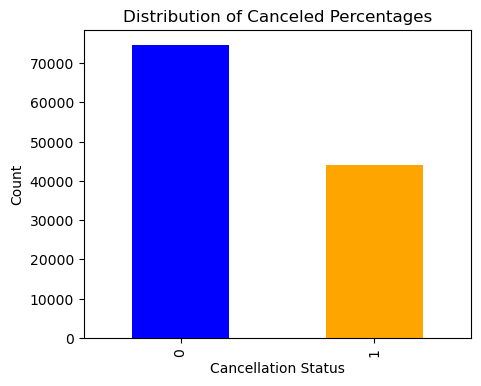

In [31]:
# ploting a distibution of canceled hotel %
plt.figure(figsize=(5, 4))
data["is_canceled"].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Canceled Percentages')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

## Insight:- 
### The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that there are stil a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotels’ earnings.

In [32]:
Resort_Hotels = data[data['hotel'] == 'Resort Hotel'] 
Resort_Hotels['is_canceled'].value_counts(normalize = True).round(2) * 100  # finding resort hotel data

0    72.0
1    28.0
Name: is_canceled, dtype: float64

In [33]:
City_Hotel = data[data['hotel'] == 'City Hotel']
City_Hotel['is_canceled'].value_counts(normalize = True).round(2) * 100  #finding city hotel data 

0    58.0
1    42.0
Name: is_canceled, dtype: float64

In [84]:
# plotting histogram using plotly to find Reservation Status in different  hotels
fig1 = px.histogram(data, x="hotel", color="is_canceled")
fig1.update_layout(autosize=False, width=900, height=400)
fig1.update_layout(title = "Reservation Status in different  hotels")
fig1.show()

## Insights:-
### In comparison to resort hotels, City hotels have more bookings. It's possible that resort hotels are more expensive than those in cities.


In [35]:
#calculating avg daily rate on daily bases for resort hotel
Resort_Hotels = Resort_Hotels.groupby('reservation_status_date')[['adr']].mean()  
Resort_Hotels

adr
reservation_status_date            
2014-11-18                 0.000000
2015-01-01                61.966667
2015-01-02                 9.633750
2015-01-18                 0.000000
2015-01-21                37.301209
...                             ...
2017-09-08               101.012500
2017-09-09               147.778333
2017-09-10               145.272500
2017-09-12               153.570000
2017-09-14               105.930000

[913 rows x 1 columns]

In [36]:
#calculating avg daily rate on daily bases for city hotel
City_Hotels = City_Hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotels

adr
reservation_status_date            
2014-10-17                62.800000
2015-01-01                62.063158
2015-01-20                76.500000
2015-01-30                61.400000
2015-02-17                76.500000
...                             ...
2017-09-03               137.172600
2017-09-04               116.925385
2017-09-05               154.000000
2017-09-06                93.293333
2017-09-07               159.685000

[864 rows x 1 columns]

In [37]:
# plotting line chart to find the trend of Average Daily Rate in City and Resort Hotel
fig2 = px.line(Resort_Hotels, x=Resort_Hotels.index, y='adr', title='Average Daily Rate in City and Resort Hotel')
fig2.add_scatter(x=City_Hotels.index, y=City_Hotels['adr'], mode='lines', name='City Hotel')
fig2.add_scatter(x=Resort_Hotels.index, y=Resort_Hotels['adr'], mode='lines', name='Resort Hotel')
fig2.show()

## Insights:-
### The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.


In [85]:
data['month'] = data['reservation_status_date'].dt.month  #Extracting only month data 

0         7
1         7
2         7
3         7
4         7
         ..
119385    9
119386    9
119387    9
119388    9
119389    9
Name: month, Length: 118898, dtype: int64

In [44]:
# plotting histogram using plotly to find the Reservation status per month
fig3 = px.histogram(data, x="month", color="is_canceled", nbins=12, color_discrete_sequence=px.colors.qualitative.Plotly)
fig3.update_layout(title_text='Reservation status per month')
fig3.update_layout(xaxis_title_text='Month', yaxis_title_text='Number of Reservations')
fig3.update_layout(bargap=0.4, barmode='group')
fig3.show()

## Insights
### We have developed the grouped histogram by using plotly Express library to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen, both the number of confirmed reservations and the number of canceled reservations are largest in the month of August. whereas January is the month with the most canceled reservations.

In [86]:
# Filter data for canceled reservations
canceled_data = data[data['is_canceled'] == 1]
# Group by month and calculate the mean ADR
monthly_adr = canceled_data.groupby('month')['adr'].mean().reset_index()

#plotting bar graph using plotly to find the ADR per month for Canceled Reservations
fig = px.bar(monthly_adr, x='month', y='adr', labels={'month':'Month', 'adr':'Average Daily Rate (ADR)'})
fig.update_layout(title='ADR per month for Canceled Reservations')
fig.show()

## Insights:-
### This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the ‘accommodation is solely responsible for the cancellation.

In [53]:
# calculating canceled data of top 10 countries
Canceled_data = data[data['is_canceled']==1]
top_10_country = Canceled_data['country'].value_counts()[:10]
top_10_country

PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

In [62]:
# plotting pie chart by using plotly to find Top 10 country with reservation canceled
fig = px.pie(top_10_country, values='country', names=top_10_country.index)
fig.update_layout(title='Top 10 country with reservation canceled')
fig.show()

## Insights:
### Now, let's see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.

### Let's check the area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline Travel Agents? Around 46% of the clients come from online travel agencies, whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations.

In [64]:
data['market_segment'].value_counts()   #calculating total values on the bases of diffrent market segment

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [70]:
data['market_segment'].value_counts(normalize = True).round(4) #normalized to represent proportions (i.e., the relative frequencies of each unique value)

Online TA        0.4744
Offline TA/TO    0.2032
Groups           0.1666
Direct           0.1047
Corporate        0.0430
Complementary    0.0062
Aviation         0.0020
Name: market_segment, dtype: float64

In [69]:
Canceled_data['market_segment'].value_counts(normalize = True).round(4)

Online TA        0.4697
Groups           0.2740
Offline TA/TO    0.1875
Direct           0.0435
Corporate        0.0222
Complementary    0.0020
Aviation         0.0012
Name: market_segment, dtype: float64

In [72]:
# checking canceled hotel data on average daily rate 
canceled_data_adr = Canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_data_adr.reset_index(inplace = True)
canceled_data_adr.sort_values('reservation_status_date', inplace = True)
canceled_data_adr

reservation_status_date         adr
0                2014-10-17   62.800000
1                2014-11-18    0.000000
2                2015-01-01   62.062779
3                2015-01-02    9.633750
4                2015-01-18    0.000000
..                      ...         ...
897              2017-08-26  178.200000
898              2017-08-27  167.300000
899              2017-08-28   81.416667
900              2017-08-29  144.253333
901              2017-08-31  189.750000

[902 rows x 2 columns]

In [74]:
# checking not canceled hotel data on average daily rate
not_canceled_data_adr = data[data['is_canceled']==0]
not_canceled_data_adr = not_canceled_data_adr.groupby('reservation_status_date')[['adr']].mean()
not_canceled_data_adr.reset_index(inplace = True)
not_canceled_data_adr.sort_values('reservation_status_date', inplace = True)
not_canceled_data_adr

reservation_status_date         adr
0                2015-07-01   31.650000
1                2015-07-02   95.924000
2                2015-07-03   97.645205
3                2015-07-04  110.480000
4                2015-07-05  100.308485
..                      ...         ...
800              2017-09-08  101.012500
801              2017-09-09  147.778333
802              2017-09-10  145.272500
803              2017-09-12  153.570000
804              2017-09-14  105.930000

[805 rows x 2 columns]

In [81]:
# plotting line chart using plotly to find Average daily rate on the bases of reservation status data
fig = px.line(not_canceled_data_adr, x='reservation_status_date', y='adr', title='Average Daily Rate')
fig.add_scatter(x=canceled_data_adr['reservation_status_date'], y=canceled_data_adr['adr'], mode='lines', name ='canceled')
fig.add_scatter(x=not_canceled_data_adr['reservation_status_date'], y=not_canceled_data_adr['adr'], mode='lines',name='not_canceled')
fig.show()

## Insights :- 
### As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves ail the above analysis,that the higher price leads to higher cancellation.

# Suggestions

### 1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts the consumers.
### 2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
### 3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancelation i the highest in this month.
### 4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.
### 5. They can charge minimum amount of booking cancellacancellation
### 6. Also hotels can provide a coupons for previous customer to discount on next visit